In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
cars = pd.read_csv('Cars93.csv')

In [5]:
cars = cars.dropna()

In [6]:
cars = cars.drop('Unnamed: 0', axis=1)

In [7]:
cars = cars.drop(columns=['Manufacturer', 'Model', 'Make'])

In [8]:
y = cars[['MPG.highway']].copy()

In [9]:
X = cars.drop('MPG.highway', axis=1).copy()

In [10]:
X = pd.get_dummies(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [12]:
reg = LinearRegression().fit(X_train, y_train)
predict = reg.predict(X_test)


ValueError: too many values to unpack (expected 4)

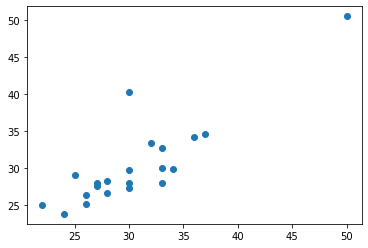

In [14]:
ax = plt.scatter(x=y_test, y=predict)
slope, intercept, r, p, stderr = scipy.stats.linregress(y_test, predict)
line = f'Slope: {slope: .2f}\nIntercept: {intercept:.2f}\nCorrelation coefficient: r={r:.2f}' 

ax.plt(y_test, intercept + slope*y_test, label=line, color= 'red')